### Lab 1.2: Binary Linear Classifier

In this lab you will try making a binary linear classifier using the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

You will need to install the packages ``sklearn``, ``palmerpenguins``, and ``mlxtend``.  In the following code block, the ``!`` indicates a shell command.

In [1]:
!pip install scikit-learn palmerpenguins mlxtend

  Using cached scikit_learn-1.6.1-cp310-cp310-macosx_12_0_arm64.whl (11.1 MB)
  Using cached palmerpenguins-0.1.4-py3-none-any.whl (17 kB)
  Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.15.1-cp310-cp310-macosx_14_0_arm64.whl (24.8 MB)
  Using cached numpy-2.2.2-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)
  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
  Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
  Using cached pillow-11.1.0-cp310-cp310-macosx_11_0_arm64.whl (3.1 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
  Using cached fonttools-4.55.8-cp310-cp310-macosx_10_9_universal2.wh

In [2]:
import sklearn
from palmerpenguins import load_penguins
from mlxtend.plotting import plot_decision_regions

The dataset is loaded as a [Pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).  

In [3]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


For simplicity we will drop any rows with missing values (encoded as NaNs).

In [4]:
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's select just the Adelie and Chinstrap penguins.

In [5]:
df = df[(df['species']=='Adelie')|(df['species']=='Chinstrap')]

Now we will grab the flipper length and bill length to be the features (stored in ``X``) and the species as the labels (stored in ``y``).

In [6]:
X = df[['flipper_length_mm','bill_length_mm']].values
y = df['species'].map({'Adelie':0,'Chinstrap':1}).values

## Exercises

1. Fit a binary linear classifier using scikit-learn (see ``sklearn.linear_model.LogisticRegression``).

Plot the resulting classifier using ``plot_decision_regions(X, y, clf=model)``.


<Axes: >

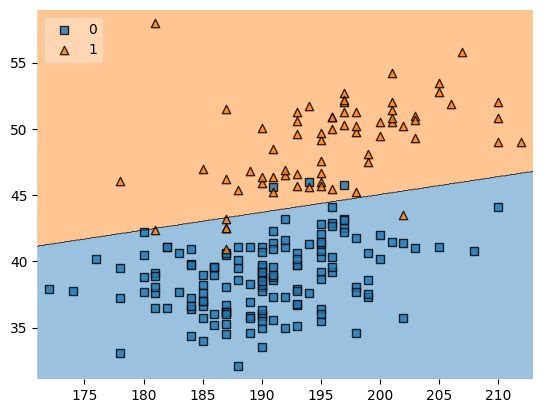

In [7]:
# fit a binary linear classifier using sci-kit learn (sklearn.linear_model.LogisticRegression)
# Plot the resulting classifier using plot_decision_regions(X, y, clf=model)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

plot_decision_regions(X, y, clf=model, legend=2)

2. Print out the coefficients of the line (``model.coef_``).  Interpret these values (in terms of the direction of the line and also what they tell us about how the classifier operates).

In [8]:
print(model.coef_)


[[-0.15845623  1.17936568]]


The Bill Length coefficient is much larger (1.179) than compared to Flipper Length. This indicates that bill length contributes more significantly to the classification decision. Decision boundary is more sensitive to changes in bill length than flipper length. The positive sign of the bill length coeff means that as bill length increases the model is more likely to classifiy a penguin as a Chinstrap, vice versa for Adelie. The classifier classifies as being a Chinstrap if the probability is greater than 0.5, and as an Adelie if the probability is less than 0.5.

3. Calculate and print out the accuracy of the classifier using the `.score` function.  Interpret this value.

In [9]:
# print the accuracy of the model using .score function
print(model.score(X, y))

0.9579439252336449


An accuracy score of 0.9579 means that the model correctly classified 95.79% of the penguins in the dataset.

4. Try different combinations of features and print out the accuracy for each one.  Interpret your results.

In [10]:
X = df[['flipper_length_mm','bill_length_mm', 'bill_depth_mm']].values

model = LogisticRegression()
model.fit(X, y)

model.score(X, y)

0.985981308411215

An accuracy score of 0.985 means that the model correctly classified 98.5% of the penguins in the dataset.

In [11]:
X = df[['bill_length_mm', 'bill_depth_mm']].values

model = LogisticRegression()
model.fit(X, y)

model.score(X, y)

0.9719626168224299

An accuracy score of 0.9719 means that the model correctly classified 97.16% of the penguins in the dataset.